# OpenCV

OpenCV is a popular framework for image and video processing. On this tutorial,
we show how OpenPifPaf can integrate with a workflow from OpenCV. OpenPifPaf
also comes with a video tool for processing videos from files or usb cameras
that is based on OpenCV, {ref}`openpifpaf.video <cli-help-video>`.

In [1]:
import cv2
import openpifpaf

%matplotlib inline
openpifpaf.show.Canvas.show = True
openpifpaf.show.Canvas.image_min_dpi = 200

## Source

The `cv2.VideoCapture` class supports an enourmous amount of sources 
(files, cameras, rtmp, etc, ...) and abstracts the details away. Here, we will
just pass in a single image.

In [2]:
capture = cv2.VideoCapture('test-mini.jpg')
_, image = capture.read()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

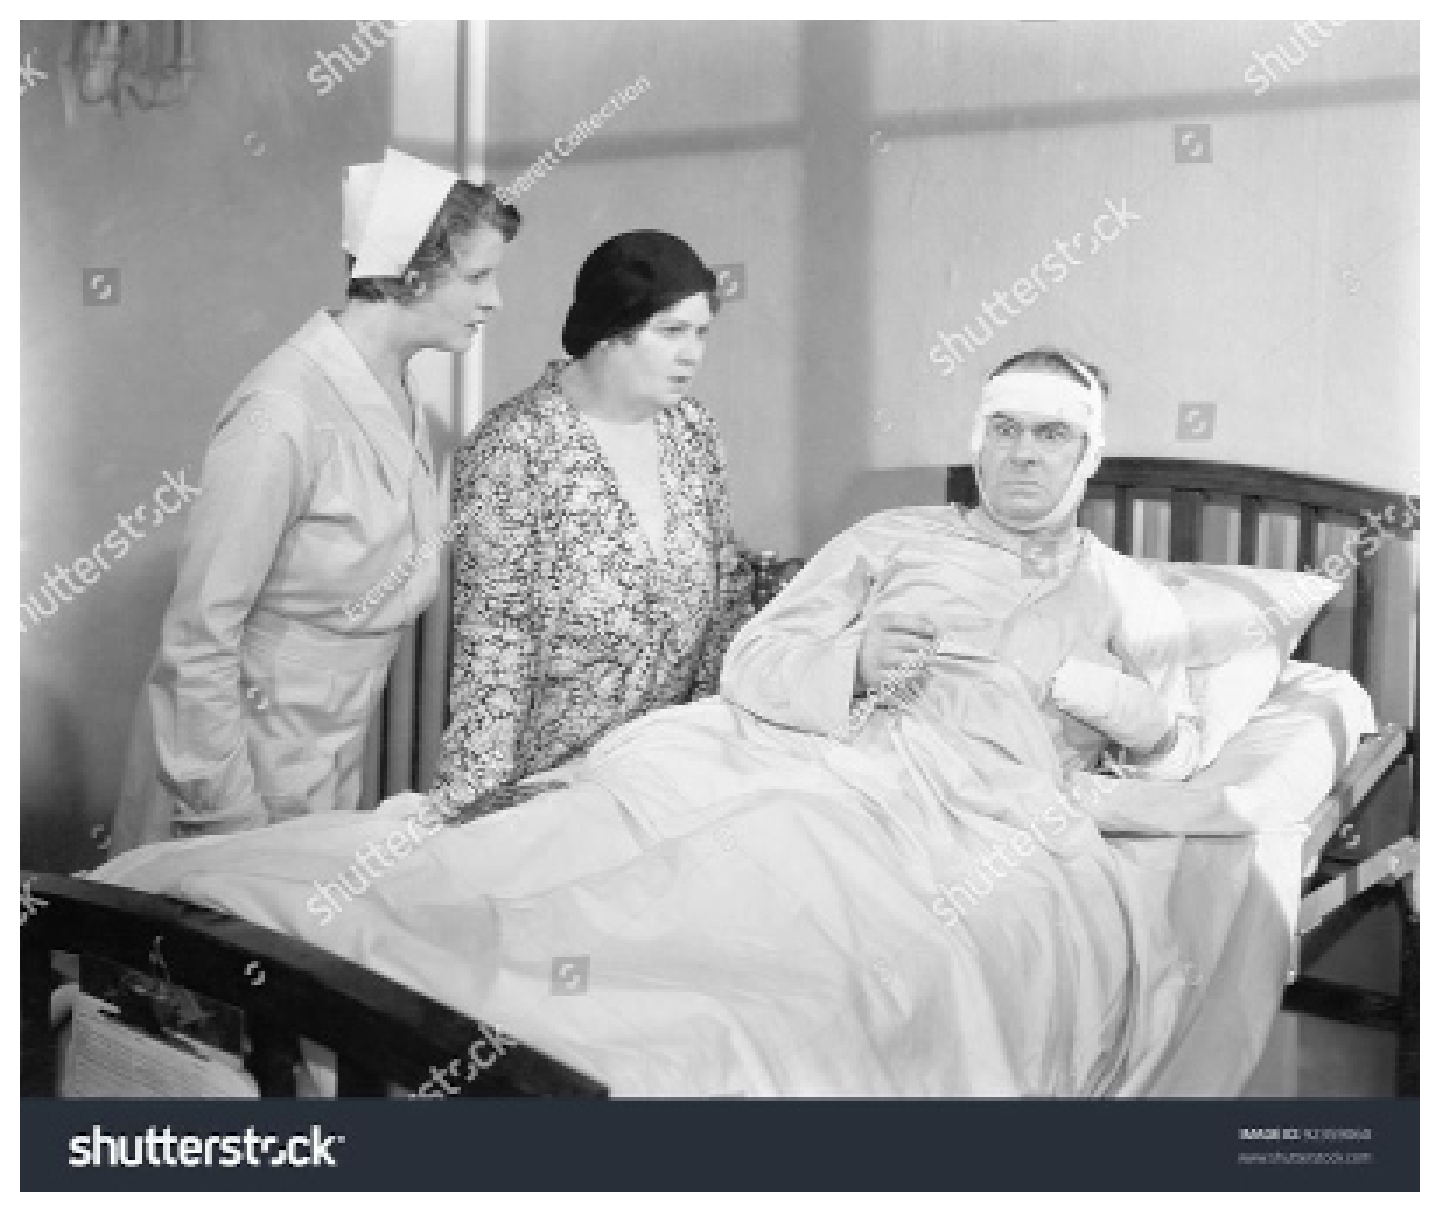

In [3]:
with openpifpaf.show.Canvas.image(image) as ax:
    pass

## Prediction

Now that we have the image, we can use the `openpifpaf.Predictor` and then
visualize its predicted annotations with an `AnnotationPainter`:

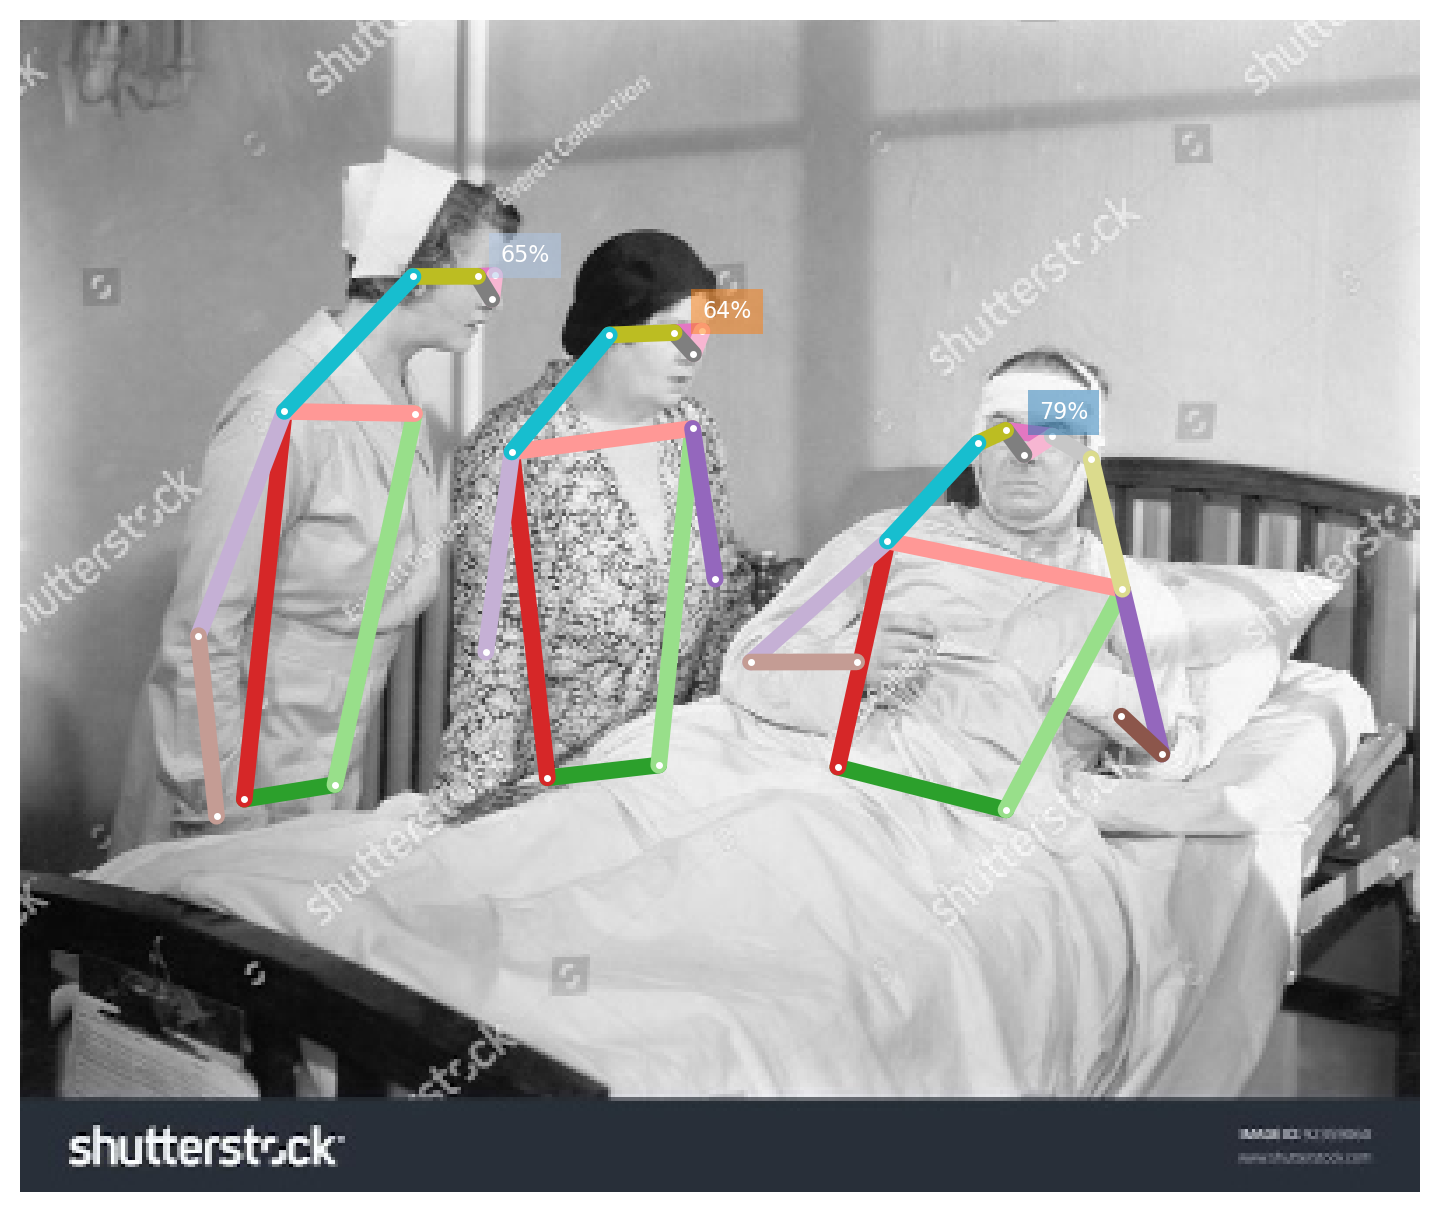

In [4]:
predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16')
predictions, gt_anns, meta = predictor.numpy_image(image)

annotation_painter = openpifpaf.show.AnnotationPainter()
with openpifpaf.show.Canvas.image(image) as ax:
    annotation_painter.annotations(ax, predictions)

This example is intentionally left to be quite basic. If you are interested
to accelerate this process with a GPU or you have many images that should be
pre-loaded in parallel, please have a look at the {doc}`Prediction API <predict_api>` 
or use the {ref}`openpifpaf.video <cli-help-video>` command line tool.